In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=5253d72c0b5bcdb9064b1e1af3c4b6310494c1fea05f4ee2caaeb1721cae7c4b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


##LinearSVC()

[LinearSVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
```
LinearSVC(penalty, loss, dual, tol, C, multi_class, fit_intercept, intercept_scaling, class_weight, verbose, random_state, max_iter)
```
- <font color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2) – default : l2 </font>
- loss : 손실함수
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font color=yellow> C : 규제 강도 </font> 
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- verbose : 동작 과정에 대한 출력 메시지
- random_state : 난수 seed 설정
- max_iter : 계산에 사용할 작업 수

In [2]:
#import 
from mglearn.datasets import make_forge #임의의 x y데이터 를 가진 
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [3]:
x,y = make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


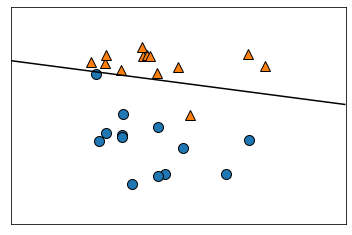

In [4]:
# 규제 강도 가 100 일떄 = 경계 치에 과적합을 볼수 있다
model = LinearSVC(C = 100).fit(x,y)
mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)



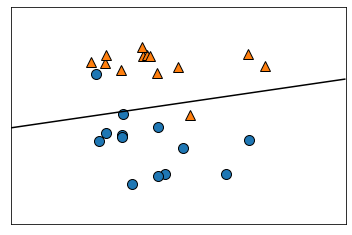

In [5]:
#규제 강도가 0.01 일때  = 경계치 에서 내려와 완만한 기울기를 나타낸다 = 줄어 들면서 아래로  내려가는 현상
model = LinearSVC(C = 0.01).fit(x,y)
mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

##C 값에 따른 결정경계 변화

'\nc = 0.01 10 1000 일때 각도를 볼수 있다 \n이때 c 값이 커질수록 경사각이 급해지는것을 볼수 있다.\n'

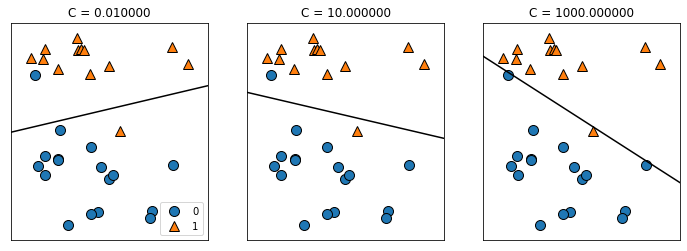

In [6]:
mglearn.plots.plot_linear_svc_regularization()
'''
c = 0.01 10 1000 일때 각도를 볼수 있다 
이때 c 값이 커질수록 경사각이 급해지는것을 볼수 있다.
'''

##LinearSVC 실습 1
와인 데이터 분류

In [7]:
from sklearn.datasets import load_wine

wine = load_wine()
C = [100,10,1,0.1,0.01]
x = wine.data
y = wine.target

In [8]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

In [9]:
for c in C:
  model = LinearSVC(C = c).fit(train_x,train_y)
  print('C: {} train_score: {} test_score: {}'.format(c,model.score(train_x,train_y),model.score(test_x,test_y)))

'''
C 값에 따라 규칙 적인 모습을 보이지 않으면서 random_state 값에 따라 또 달라진다.
'''

C: 100 train_score: 0.6466165413533834 test_score: 0.5555555555555556
C: 10 train_score: 0.8947368421052632 test_score: 0.8666666666666667
C: 1 train_score: 0.6015037593984962 test_score: 0.5333333333333333
C: 0.1 train_score: 0.7894736842105263 test_score: 0.8666666666666667
C: 0.01 train_score: 0.9097744360902256 test_score: 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

'\nC 값에 따라 규칙 적인 모습을 보이지 않으면서 random_state 값에 따라 또 달라진다.\n'

In [10]:
#predict 
pred_y = model.predict(test_x)
print(np.mean(np.equal(test_y,pred_y)))

0.9555555555555556


##LinearSVC 실습 2

붓꽃 데이터 분류

In [26]:
#import 
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

#데이터 로드 
iris = load_iris()

C = [0.01,0.1,1,10,100]

x = iris.data
y = iris.target





In [27]:
#train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)


In [28]:
#model 생성 학습 평가 

for c in C:
  model = LinearSVC(C = c,max_iter = 10000).fit(train_x,train_y)
  print('C : {} train_score : {} test_score : {}'.format(c,model.score(train_x,train_y),model.score(test_x,test_y)))

'''
데이터의 수가 많지 않아서 random state 랑 규제 값 C 에 의해 과적합 방지 및 데이터 정확도를 높일수 있다.
'''


C : 0.01 train_score : 0.6964285714285714 test_score : 0.5789473684210527
C : 0.1 train_score : 0.9464285714285714 test_score : 0.868421052631579
C : 1 train_score : 0.9821428571428571 test_score : 0.9210526315789473
C : 10 train_score : 0.9910714285714286 test_score : 0.9473684210526315
C : 100 train_score : 0.9821428571428571 test_score : 0.9736842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'\n데이터의 수가 많지 않아서 random state 랑 규제 값 C 에 의해 과적합 방지 및 데이터 정확도를 높일수 있다.\n'

In [29]:
#model 예측 
pred_y = model.predict(test_x)

np.mean(np.equal(pred_y,test_y)) #C = 100 일때 가장 높은 값을 보유 한다. 

0.9736842105263158